In [ ]:
import librosa
from scipy.fftpack import fft
import IPython.display as ipd
import matplotlib.pyplot as plt
from librosa import display
import numpy as np
import soundfile as sf
import sklearn
import pandas as pd
import os, wave
import re 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


For this whole section the references are:


1.    https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db
2.   https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6




In [ ]:

df = pd.read_csv('/content/drive/MyDrive/processed_dataset/metadata_compiled.csv')
df

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status,quality_1,cough_type_1,dyspnea_1,wheezing_1,stridor_1,choking_1,congestion_1,nothing_1,diagnosis_1,severity_1,quality_2,cough_type_2,dyspnea_2,wheezing_2,stridor_2,choking_2,congestion_2,nothing_2,diagnosis_2,severity_2,quality_3,cough_type_3,dyspnea_3,wheezing_3,stridor_3,choking_3,congestion_3,nothing_3,diagnosis_3,severity_3,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15.0,male,False,False,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,NaN,NaN,46.0,female,False,False,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34.0,male,True,False,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27545,fff30afc-db62-4408-a585-07ca9a254fcc,2020-11-05T08:26:04.219206+00:00,0.9698,11.109221,40.7,29.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27546,fff3ff61-2387-4139-938b-539db01e6be5,2020-06-28T21:28:21.530881+00:00,0.5257,43.932829,51.6,-0.2,NaN,female,False,False,symptomatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27547,fff474bf-39a4-4a61-8348-6b992fb5e439,2020-04-10T05:10:36.787070+00:00,0.1945,27.702036,-39.0,-68.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27548,fffaa9f8-4db0-46c5-90fb-93b7b014b55d,2020-04-13T18:58:26.954663+00:00,0.0243,8.825849,41.0,28.8,50.0,male,True,True,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
latlong = pd.DataFrame(df['uuid'])
latlong

,uuid
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c
1,00039425-7f3a-42aa-ac13-834aaa2b6b92
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e
...,...
27545,fff30afc-db62-4408-a585-07ca9a254fcc
27546,fff3ff61-2387-4139-938b-539db01e6be5
27547,fff474bf-39a4-4a61-8348-6b992fb5e439
27548,fffaa9f8-4db0-46c5-90fb-93b7b014b55d


In [ ]:
latlong ['lat'] = df['latitude']
latlong ['long'] = df['longitude']

In [ ]:
latlong = latlong.dropna() # dropping null values 

In [ ]:
latlong

,uuid,lat,long
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,48.9,2.4
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,31.3,34.8
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,40.0,-75.1
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e,-16.5,-71.5
6,001c85a8-cc4d-4921-9297-848be52d4715,40.6,-3.6
...,...,...,...
27545,fff30afc-db62-4408-a585-07ca9a254fcc,40.7,29.8
27546,fff3ff61-2387-4139-938b-539db01e6be5,51.6,-0.2
27547,fff474bf-39a4-4a61-8348-6b992fb5e439,-39.0,-68.1
27548,fffaa9f8-4db0-46c5-90fb-93b7b014b55d,41.0,28.8


### Getting the min and max for BBox

In [ ]:
print(latlong.long.min())
print(latlong.long.max())
print(latlong.lat.min())
print(latlong.lat.max())

-158.1
175.7
-54.8
65.1


In [ ]:
BBox = (-158.1,175.7,-54.8,65.1)

In [ ]:
ruh_m = plt.imread('/content/drive/MyDrive/PngItem_41856.png')

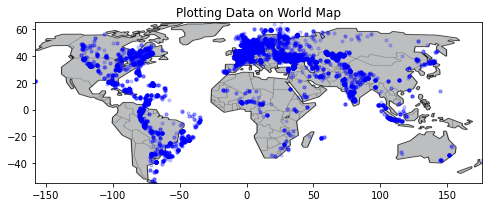

In [ ]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(latlong.long, latlong.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Data on World Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
#even better this way
import descartes
import geopandas as gpd
from shapely.geometry import Point,Polygon

%matplotlib inline

In [ ]:
#import sys

#'geopandas' in sys.modules

'plotly-orca' in sys.modules

False

In [ ]:
import plotly.express as px
fig = px.scatter_geo(latlong,lat='lat',lon='long', hover_name="uuid")
fig.update_layout(title = 'Showing the data on World map', title_x=0.5)
#fig.write_image("fig1.png")
fig.show()